## Census Income 

## Importing required libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Loading Data

In [3]:
df = pd.read_csv("data.csv")

## Information about data

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  32561 non-null  object
 14  class           32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


We have 6 numerical feature and 9 categorical features

### Sample data

In [4]:
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


## Shape of the Data

In [6]:
df.shape

(32561, 15)

we have 32561 rows and 15 columns in dataset

## Features Information

In [19]:
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'class'],
      dtype='object')

* age: Age of the person
* workclass: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.
* fnlwgt: continuous.
* education: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.
* education-num: continuous.
* marital-status: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.
* occupation: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.
* relationship: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.
* race: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.
* sex: Female, Male.
* capital-gain: continuous.
* capital-loss: continuous.
* hours-per-week: continuous.
* native-country: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.
* class : >50K, <=50K.





### Missing Values in data

In [8]:
df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
class             0
dtype: int64

There are no any null values

### Categorical and Numerical features

In [10]:
cat_feature = [col for col in df.columns if df[col].dtype == "O"]
num_feature = [col for col in df.columns if df[col].dtype != "O"]
print(f"There are {len(cat_feature)} categorical features in dataset : ",cat_feature)
print(f"There are {len(num_feature)} Numerical features in dataset : ",num_feature)

There are 9 categorical features in dataset :  ['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'native-country', 'class']
There are 6 Numerical features in dataset :  ['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']


### Duplicate values in Dataset

In [14]:
df.duplicated().sum()

24

We have 24 duplicate rows

### Dropping duplicate rows

In [16]:
df.drop_duplicates(inplace=True)

## Stats of Dataset Numerical features

In [18]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,32537.0,38.585549,13.637984,17.0,28.0,37.0,48.0,90.0
fnlwgt,32537.0,189780.848511,105556.471009,12285.0,117827.0,178356.0,236993.0,1484705.0
education-num,32537.0,10.081815,2.571633,1.0,9.0,10.0,12.0,16.0
capital-gain,32537.0,1078.443741,7387.957424,0.0,0.0,0.0,0.0,99999.0
capital-loss,32537.0,87.368227,403.101833,0.0,0.0,0.0,0.0,4356.0
hours-per-week,32537.0,40.440329,12.346889,1.0,40.0,40.0,45.0,99.0


There are outliers present in Capital-gain and Capital-loss

### Correlation in features

In [20]:
df.corr()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
age,1.000000,-0.076447,0.036224,0.077676,0.057745,0.068515
fnlwgt,-0.076447,1.000000,-0.043388,0.000429,-0.010260,-0.018898
education-num,0.036224,-0.043388,1.000000,0.122664,0.079892,0.148422
capital-gain,0.077676,0.000429,0.122664,1.000000,-0.031639,0.078408
capital-loss,0.057745,-0.010260,0.079892,-0.031639,1.000000,0.054229
hours-per-week,0.068515,-0.018898,0.148422,0.078408,0.054229,1.000000


### Categorical feature analysis

In [23]:
for col in cat_feature:
  print(f"Unique Values in {col} feature: ")
  print(df[col].unique())
  print("--------------------------------------------------")

Unique Values in workclass feature: 
[' State-gov' ' Self-emp-not-inc' ' Private' ' Federal-gov' ' Local-gov'
 ' ?' ' Self-emp-inc' ' Without-pay' ' Never-worked']
--------------------------------------------------
Unique Values in education feature: 
[' Bachelors' ' HS-grad' ' 11th' ' Masters' ' 9th' ' Some-college'
 ' Assoc-acdm' ' Assoc-voc' ' 7th-8th' ' Doctorate' ' Prof-school'
 ' 5th-6th' ' 10th' ' 1st-4th' ' Preschool' ' 12th']
--------------------------------------------------
Unique Values in marital-status feature: 
[' Never-married' ' Married-civ-spouse' ' Divorced'
 ' Married-spouse-absent' ' Separated' ' Married-AF-spouse' ' Widowed']
--------------------------------------------------
Unique Values in occupation feature: 
[' Adm-clerical' ' Exec-managerial' ' Handlers-cleaners' ' Prof-specialty'
 ' Other-service' ' Sales' ' Craft-repair' ' Transport-moving'
 ' Farming-fishing' ' Machine-op-inspct' ' Tech-support' ' ?'
 ' Protective-serv' ' Armed-Forces' ' Priv-house-serv']

We have spaces around some feature values and '?' character in place of null values so we need to remove space and '?'

### Removing spaces from values

In [26]:
for col in cat_feature:
  df[col] = df[col].apply(lambda x : x.strip())

### Replacing '?' with Mode value of the feature

In [32]:
for col in cat_feature:
  df[col].replace('?',df[col].mode()[0],inplace=True)

## Unique Values after replacing '?' Character from features

In [33]:
for col in cat_feature:
  print(f"Unique Values in {col} feature: ")
  print(df[col].unique())
  print("--------------------------------------------------")

Unique Values in workclass feature: 
['State-gov' 'Self-emp-not-inc' 'Private' 'Federal-gov' 'Local-gov'
 'Self-emp-inc' 'Without-pay' 'Never-worked']
--------------------------------------------------
Unique Values in education feature: 
['Bachelors' 'HS-grad' '11th' 'Masters' '9th' 'Some-college' 'Assoc-acdm'
 'Assoc-voc' '7th-8th' 'Doctorate' 'Prof-school' '5th-6th' '10th'
 '1st-4th' 'Preschool' '12th']
--------------------------------------------------
Unique Values in marital-status feature: 
['Never-married' 'Married-civ-spouse' 'Divorced' 'Married-spouse-absent'
 'Separated' 'Married-AF-spouse' 'Widowed']
--------------------------------------------------
Unique Values in occupation feature: 
['Adm-clerical' 'Exec-managerial' 'Handlers-cleaners' 'Prof-specialty'
 'Other-service' 'Sales' 'Craft-repair' 'Transport-moving'
 'Farming-fishing' 'Machine-op-inspct' 'Tech-support' 'Protective-serv'
 'Armed-Forces' 'Priv-house-serv']
--------------------------------------------------
Uni

### Value counts in Categorical columns

In [41]:
for col in cat_feature:
  print(f"Value Counts in {col} feature: ")
  print(df[col].value_counts())
  print("------------------------------------------------")

Value Counts in workclass feature: 
Private             24509
Self-emp-not-inc     2540
Local-gov            2093
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: workclass, dtype: int64
------------------------------------------------
Value Counts in education feature: 
HS-grad         10494
Some-college     7282
Bachelors        5353
Masters          1722
Assoc-voc        1382
11th             1175
Assoc-acdm       1067
10th              933
7th-8th           645
Prof-school       576
9th               514
12th              433
Doctorate         413
5th-6th           332
1st-4th           166
Preschool          50
Name: education, dtype: int64
------------------------------------------------
Value Counts in marital-status feature: 
Married-civ-spouse       14970
Never-married            10667
Divorced                  4441
Separated                 1025
Widowed                    993
Married-spouse

* Most of the people belongs to United state
* Dataset is unbalanced as people income less than 50k datapoints are much higher than the other

## Graphical Analysis of dataset|

### Univariate Analysis Of Numerical features

### Plot to see distribution of data

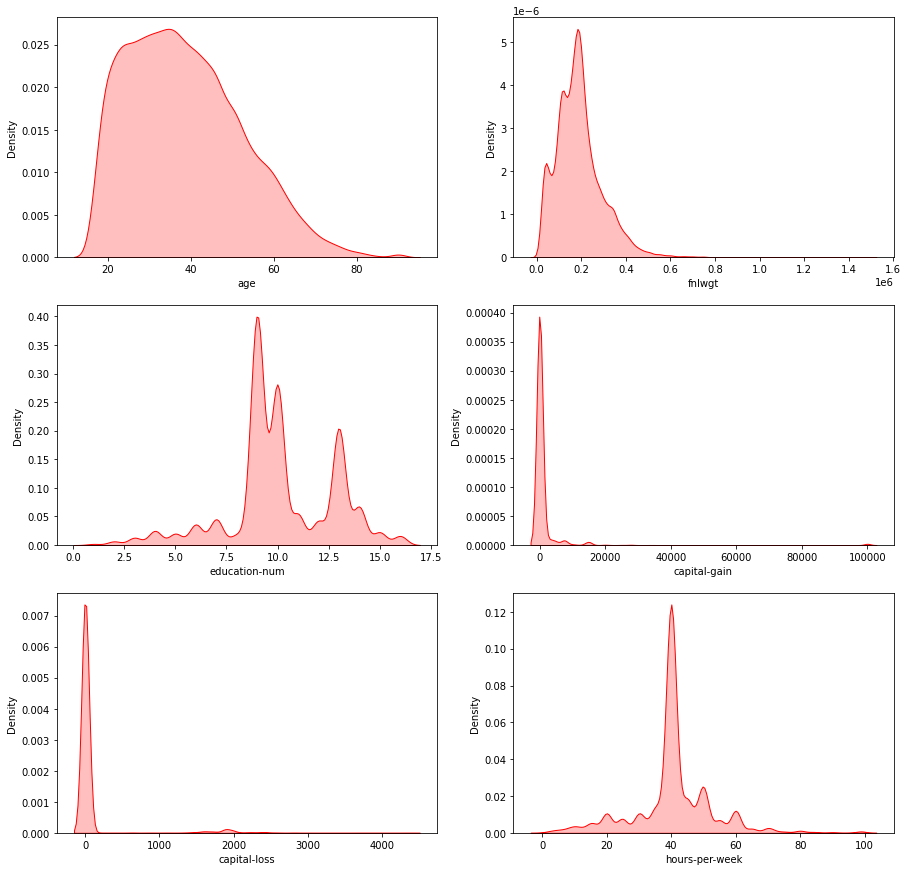

In [37]:
plt.figure(figsize=(15,15))
i = 1
for col in num_feature:
  plt.subplot(3,2,i)
  sns.kdeplot(data=df,x=col,shade=True,color='r')
  i = i +1

We are able to see skewness in data which means we have outliers present in the data

### Plot to check outliers using Boxplot

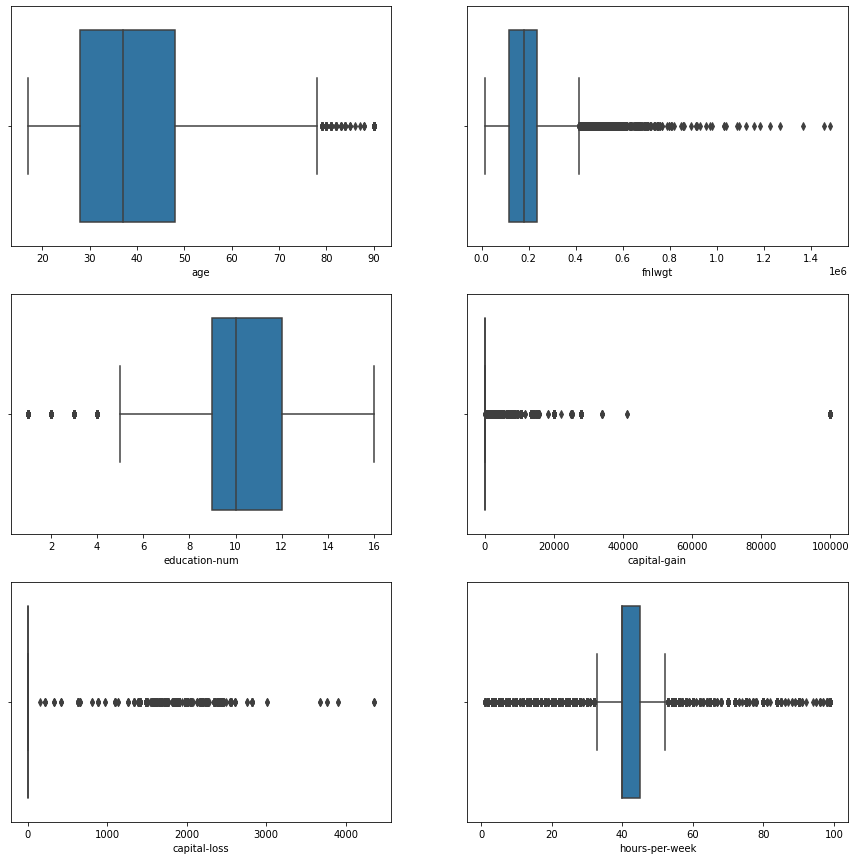

In [39]:
plt.figure(figsize=(15,15))
i = 1
for col in num_feature:
  plt.subplot(3,2,i)
  sns.boxplot(data=df,x=col)
  i = i +1

We have outliers but we will keep them as may be they required

### Univariate Analysis Of Categorical features

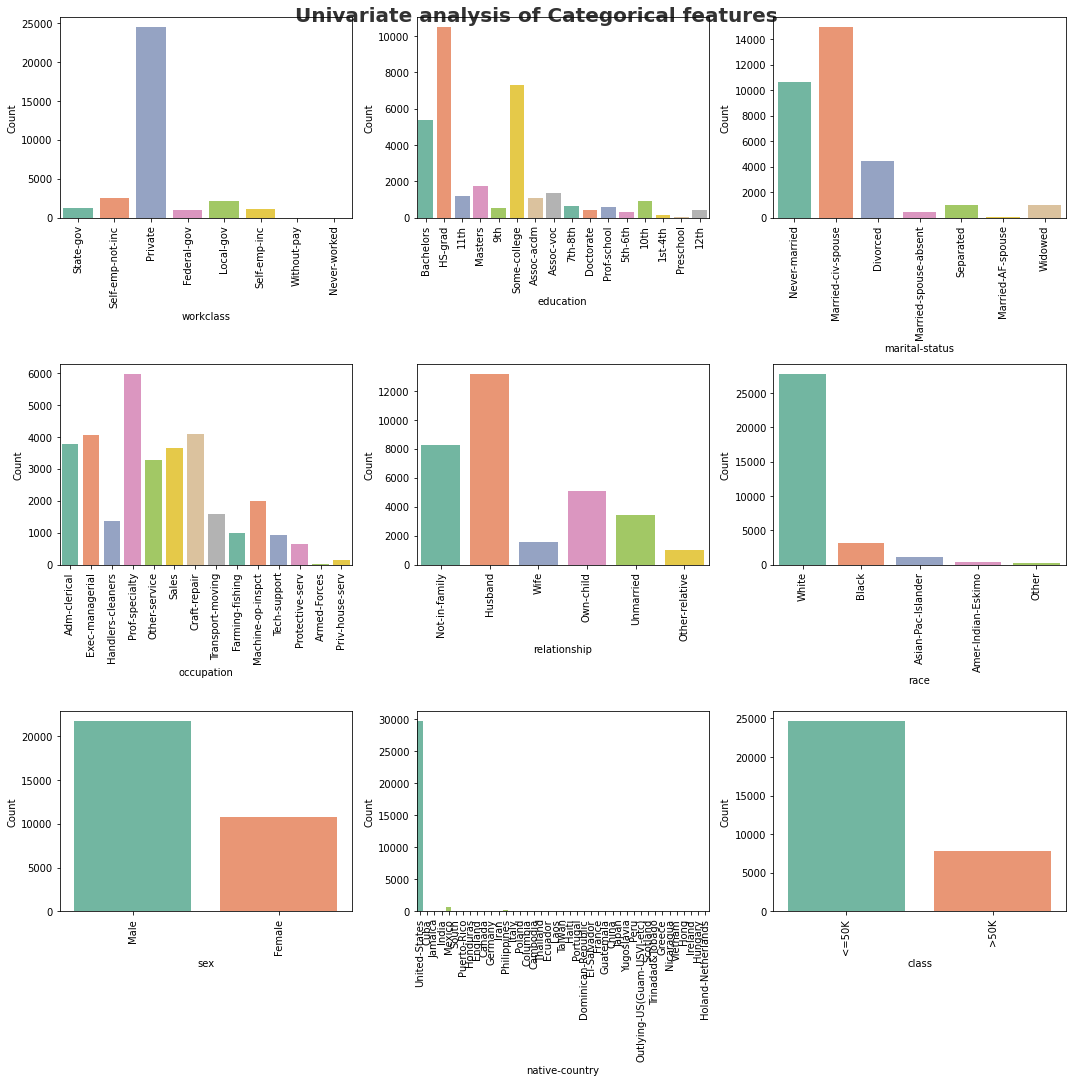

In [50]:
plt.figure(figsize=(15,15))
plt.suptitle("Univariate analysis of Categorical features", fontsize=20, fontweight='bold', alpha=0.8, y=1.)
i = 1
for col in cat_feature:
  plt.subplot(3,3,i)
  sns.countplot(data=df,x=col,palette="Set2")
  plt.xticks(rotation=90)
  plt.xlabel(col)
  plt.ylabel("Count")
  plt.tight_layout()
  i = i +1

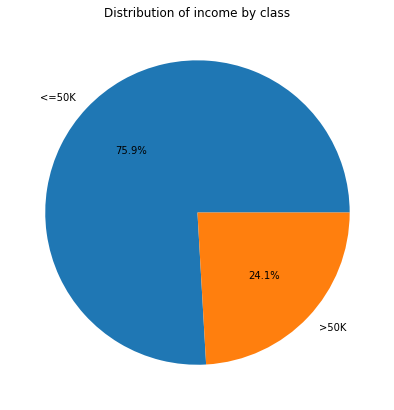

In [56]:
df['class'].value_counts().plot.pie(y = df['class'], figsize = (7, 7), label = '', autopct = '%1.1f%%', title = 'Distribution of income by class', )

Around 76% people earn less than 50K

## Bivariate analysis of dataset

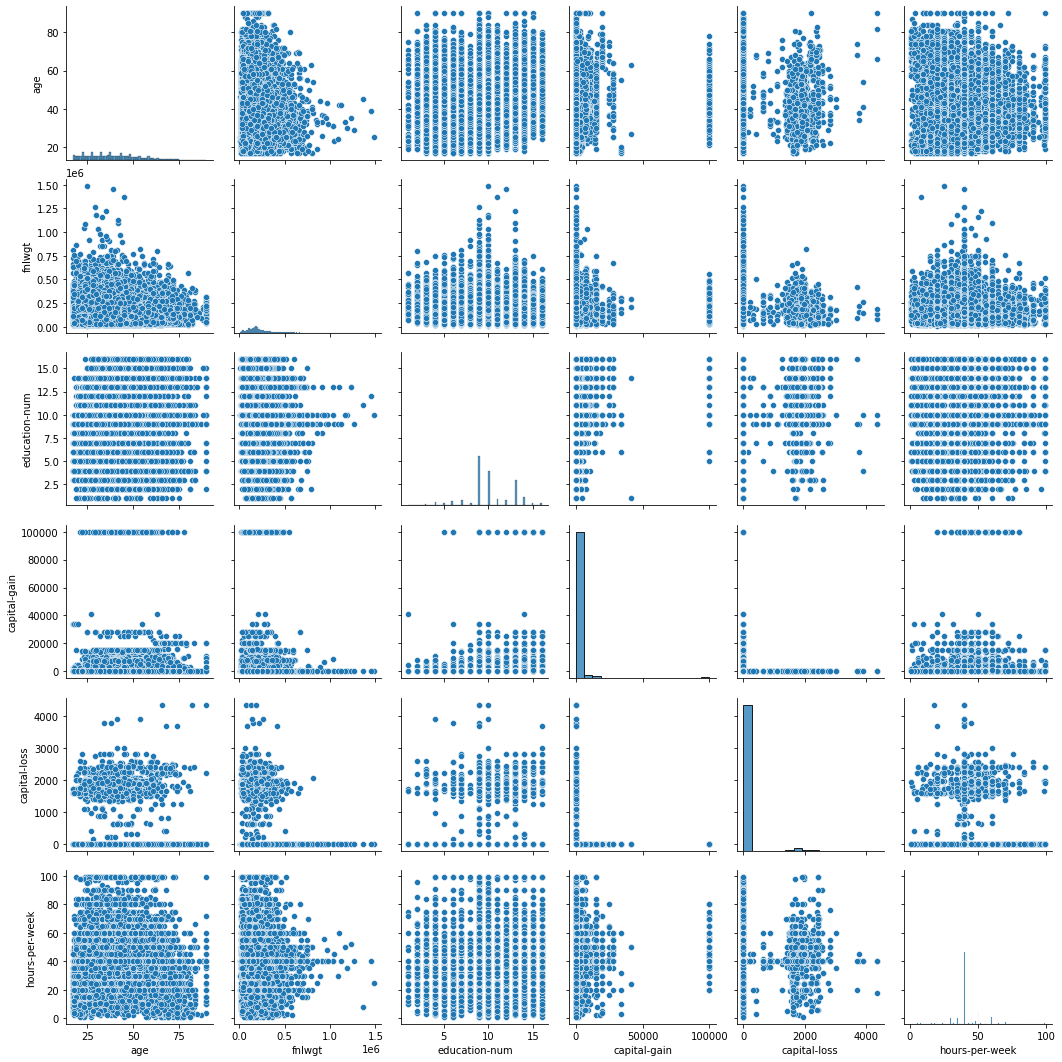

In [77]:
sns.pairplot(data=df)

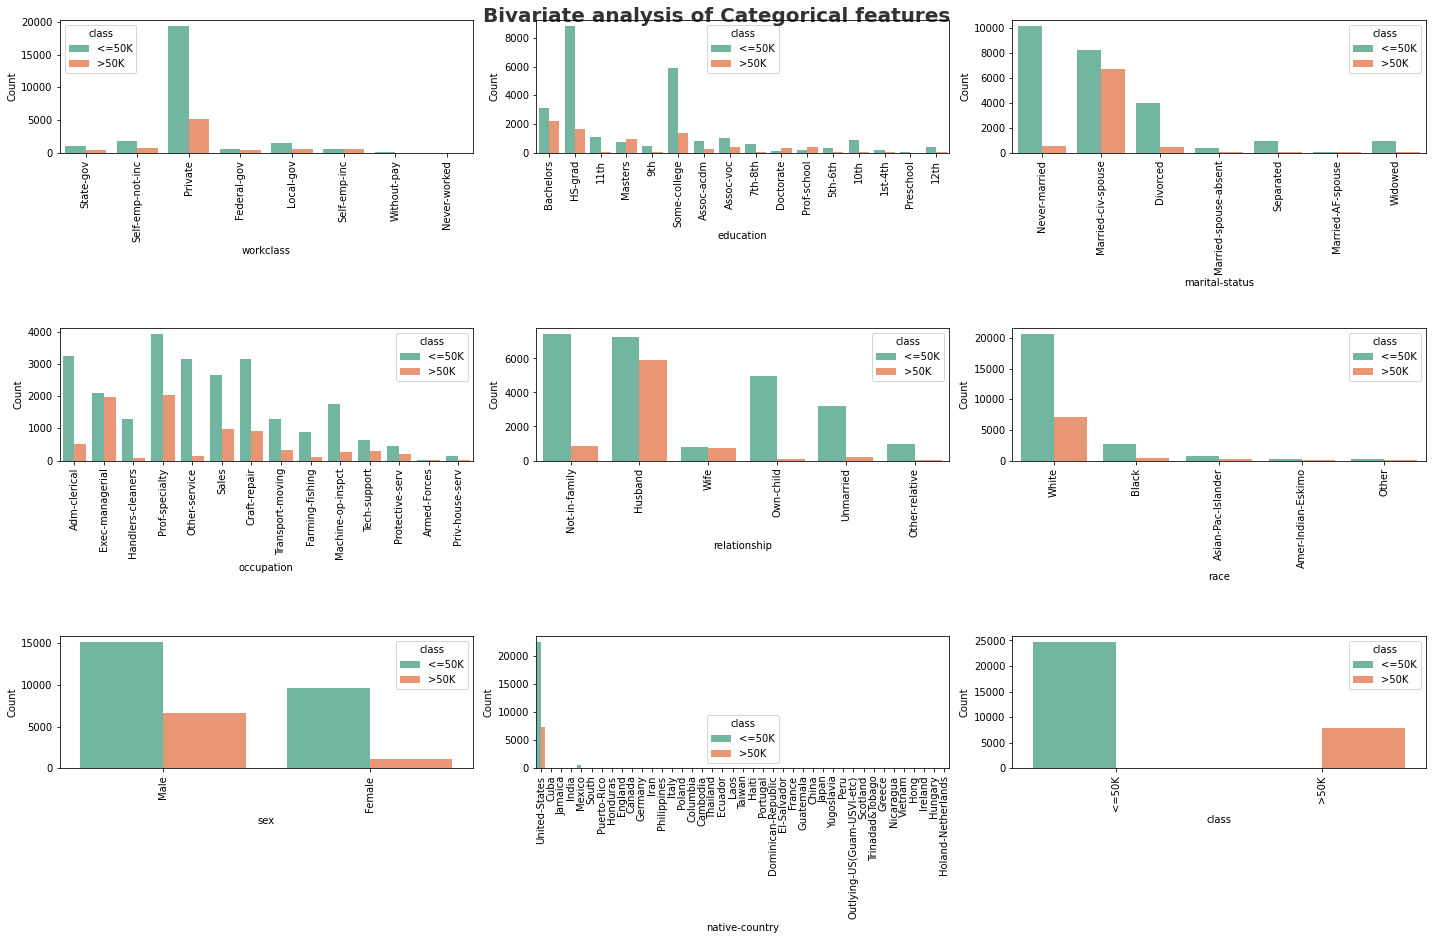

In [82]:
plt.figure(figsize=(20,15))
plt.suptitle("Bivariate analysis of Categorical features", fontsize=20, fontweight='bold', alpha=0.8, y=1.)
i = 1
for col in cat_feature:
  plt.subplot(4,3,i)
  sns.countplot(data=df,x=col,palette="Set2",hue='class')
  plt.xticks(rotation=90)
  plt.xlabel(col)
  plt.ylabel("Count")
  plt.tight_layout()
  i = i +1

People having occupation profec-speciality and exec-managerial are likely to have income greater than 50K

## Multivariate analysis of dataset

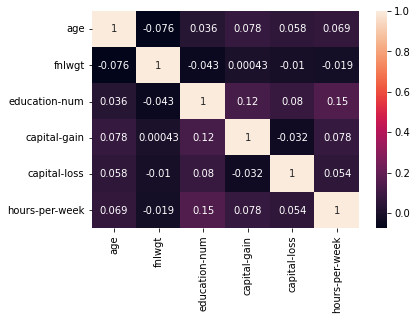

In [83]:
sns.heatmap(df.corr(),annot = True)

There is no any strongly correlated features in numerical features

### Saving cleaned data in csv

In [84]:
df.to_csv("clean_data.csv",index=False)